In [8]:
import pandas as pd

data = pd.read_csv("ai4i2020.csv")
data.head

<bound method NDFrame.head of         UDI Product ID Type  Air temperature [K]  Process temperature [K]  \
0         1     M14860    M                298.1                    308.6   
1         2     L47181    L                298.2                    308.7   
2         3     L47182    L                298.1                    308.5   
3         4     L47183    L                298.2                    308.6   
4         5     L47184    L                298.2                    308.7   
...     ...        ...  ...                  ...                      ...   
9995   9996     M24855    M                298.8                    308.4   
9996   9997     H39410    H                298.9                    308.4   
9997   9998     M24857    M                299.0                    308.6   
9998   9999     H39412    H                299.0                    308.7   
9999  10000     M24859    M                299.0                    308.7   

      Rotational speed [rpm]  Torque [Nm]  To

In [9]:
data.columns = data.columns.str.strip().str.lower().str.replace('[^a-z0-9_]', '', regex=True)

data.head()

,udi,productid,type,airtemperaturek,processtemperaturek,rotationalspeedrpm,torquenm,toolwearmin,machinefailure,twf,hdf,pwf,osf,rnf
0,1,M14860,M,298.1,308.6,1551,42.8,0,0,0,0,0,0,0
1,2,L47181,L,298.2,308.7,1408,46.3,3,0,0,0,0,0,0
2,3,L47182,L,298.1,308.5,1498,49.4,5,0,0,0,0,0,0
3,4,L47183,L,298.2,308.6,1433,39.5,7,0,0,0,0,0,0
4,5,L47184,L,298.2,308.7,1408,40.0,9,0,0,0,0,0,0


In [10]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
data['type'] = le.fit_transform(data['type'])

data[['type']].head(10)

,type
0,2
1,1
2,1
3,1
4,1
5,2
6,1
7,1
8,2
9,2


In [11]:
X = data[['type', 'airtemperaturek', 'processtemperaturek', 'rotationalspeedrpm', 'torquenm', 'toolwearmin']]

y = data['machinefailure']

print("X shape:", X.shape)
print("y shape:", y.shape)

X shape: (10000, 6)
y shape: (10000,)


In [12]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Training test size:", X_train.shape)
print("Test set size:", X_test.shape)

Training test size: (8000, 6)
Test set size: (2000, 6)


In [13]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=100, random_state=42)

rf.fit(X_train, y_train)

print("Model is trained successfully.")

Model is trained successfully.


In [15]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

y_pred = rf.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy * 100:.2f}%\n")

print("Classification Report:")
print(classification_report(y_test, y_pred))

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Model Accuracy: 98.40%

Classification Report:
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      1939
           1       0.84      0.59      0.69        61

    accuracy                           0.98      2000
   macro avg       0.91      0.79      0.84      2000
weighted avg       0.98      0.98      0.98      2000

Confusion Matrix:
[[1932    7]
 [  25   36]]


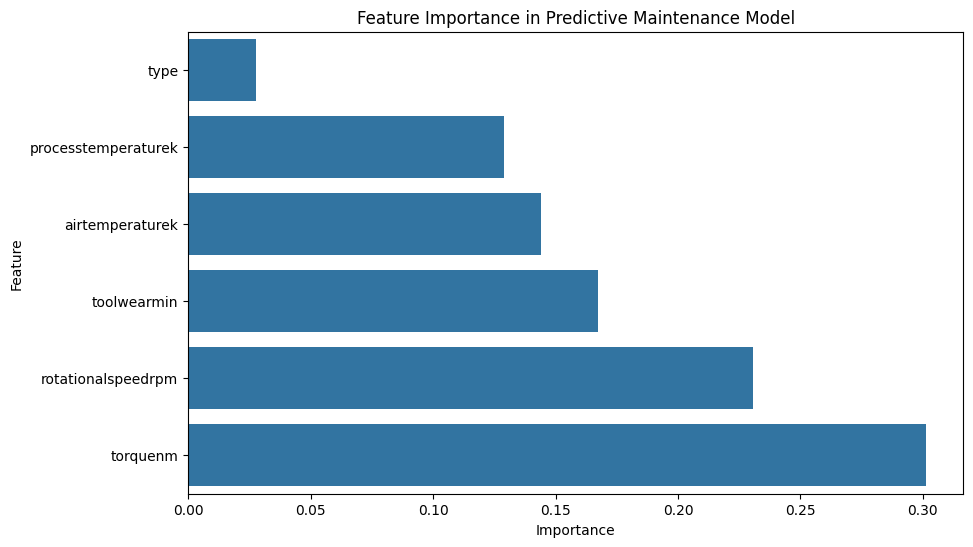

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

importances = rf.feature_importances_
features = X.columns

sorted_idx = importances.argsort()

plt.figure(figsize=(10,6))
sns.barplot(x=importances[sorted_idx], y=features[sorted_idx])
plt.title("Feature Importance in Predictive Maintenance Model")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.show()